<a href="https://colab.research.google.com/github/descartesmbogning/Deciphering_Bacteriophage_Revolution/blob/main/Scholar_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import spacy
import codecs
import re
from wordcloud import STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from nltk.stem.porter import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/data_scholar_all_year_merge.csv')
pd.set_option('display.max_columns', None)
print(len(df))
df.head()

<ipython-input-4-fcdcdb899b6c>:1: DtypeWarning: Columns (39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/data_scholar_all_year_merge.csv')


61544


Unnamed: 0 Publication Type                                   Authors  \
0           0                j                modrich, p; richardson, cc   
1           1                j      esche, h; schweiger, m; trautner, ta   
2           2                j  jazwinski, sm; lindberg, aa; kornberg, a   
3           3                j    silberstein, s; inouye, m; studier, fw   
4           4                j                                  levy, jn   

                          Author Full Names  \
0                modrich, p; richardson, cc   
1      esche, h; schweiger, m; trautner, ta   
2  jazwinski, sm; lindberg, aa; kornberg, a   
3    silberstein, s; inouye, m; studier, fw   
4                                  levy, jn   

                                       Article Title  \
0  bacteriophage-t7 deoxyribonucleic-acid replica...   
1  gene-expression of bacteriophage spp1 .1. phag...   
2  gene-h spike protein of bacteriophages phi-x17...   
3  studies on role of bacteriophage t7 lysozyme d...   
4  effects of radiophosphorus decay in bacterioph...   

                      Source Title Language Document Type Author Keywords  \
0  journal of biological chemistry  english       article             NaN   
1     molecular & general genetics  english       article             NaN   
2                         virology  english       article             NaN   
3     journal of molecular biology  english       article             NaN   
4                         virology  english       article             NaN   

  Keywords Plus Abstract                                          Addresses  \
0           NaN      NaN  harvard univ, med sch, dept biol chem, boston,...   
1           NaN      NaN  max planck inst molek genet,abt trautner,ihne ...   
2           NaN      NaN  stanford univ, sch med, dept biochem, stanford...   
3           NaN      NaN  suny, dept biochem, stony brook, ny 11794 usa;...   
4           NaN      NaN  univ washington, dept genet, seattle, wa 98105...   

                                        Affiliations Reprint Addresses  \
0         harvard university; harvard medical school               NaN   
1                                 max planck society               NaN   
2           stanford university; stanford university               NaN   
3  state university of new york (suny) system; st...               NaN   
4  university of washington; university of washin...               NaN   

  Email Addresses Researcher Ids                             ORCIDs  \
0             NaN            NaN  modrich, paul/0000-0001-8708-9885   
1             NaN            NaN                                NaN   
2             NaN            NaN                                NaN   
3             NaN            NaN                                NaN   
4             NaN            NaN                                NaN   

  Funding Orgs Funding Name Preferred Funding Text  Cited Reference Count  \
0          NaN                    NaN          NaN                     24   
1          NaN                    NaN          NaN                     25   
2          NaN                    NaN          NaN                     27   
3          NaN                    NaN          NaN                     23   
4          NaN                    NaN          NaN                     28   

   Times Cited, WoS Core  Times Cited, All Databases  180 Day Usage Count  \
0                    105                         106                    0   
1                     28                          28                    0   
2                     50                          50                    0   
3                     31                          31                    0   
4                      3                           3                    0   

   Since 2013 Usage Count                                    Publisher  \
0                       3  amer soc biochemistry molecular biology inc   
1                       0                 

In [ ]:
# Convert 'Publication Year' to integers
df['Publication Year'] = df['Publication Year'].astype(int)

# Filter based on 'Publication Year' column
df = df[df['Publication Year'] >= 2003]
len(df)

37720

In [ ]:
df = df[(~pd.isnull(df['Abstract'])) & (~pd.isnull(df['Article Title'])) & (~pd.isnull(df['Keywords Plus']))]
len(df)

36202

In [ ]:
df = df.set_index(['UT (Unique WOS ID)','Publication Year'])
df

Unnamed: 0 Publication Type  \
UT (Unique WOS ID)  Publication Year                                
wos:000183215700003 2003                   23829                j   
wos:000180955900018 2003                   23830                j   
wos:000183683300008 2003                   23831                j   
wos:000184760800009 2003                   23832                j   
wos:000187153000005 2003                   23833                j   
...                                          ...              ...   
wos:000959867000004 2023                   61561                j   
wos:000968835000001 2023                   61562                j   
wos:000933339800001 2023                   61563                j   
wos:000914484900001 2023                   61564                j   
wos:000912073200001 2023                   61566                j   

                                                                                Authors  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   
...                                                                                 ...   
wos:000959867000004 2023                         farrell, jd; dobnikar, j; podgornik, r   
wos:000968835000001 2023              lan, jx; wu, y; lin, cm; chen, jz; zhu, rq; ma...   
wos:000933339800001 2023                   hirao, r; shigetoh, k; inagaki, s; ishida, n   
wos:000914484900001 2023              brogna, c; cristoni, s; brogna, b; bisaccia, d...   
wos:000912073200001 2023                                      lee, mu; heo, yb; woo, hm   

                                                                      Author Full Names  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   
...                                                                                 ...   
wos:000959867000004 2023              farrell, james daniel; dobnikar, jure; podgorn...   
wos:000968835000001 2023              lan, jinxin; wu, yao; lin, changmei; chen, jia...   
wos:000933339800001 2023              hirao, rie; shigetoh, keisuke; inagaki, shinji...   
wos:000914484900001 2023              brogna, carlo; cristoni, simone; brogna, barba...   
wos:000912073200001 2023                         lee, mieun; heo, yu been; woo, han min   

                                                                          Article Title  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              expression of recombinant human l-glutaminase ...   
wos:000180955900018 2003              structure-based improvement of the biophysical...   
wos:000183683300008 2003              activity of coliphage hk022 excisionase (xis) ...   
wos:000184760800009 2003              bacteriophages ms2 and prd1 in turfgrass by su...   
wos:000187153000005 2003              the refined structure of a protein catenane: t...   
...                                                                                 ...   
wos:000959867000004 2023              role o

In [ ]:
data = [str(df['Article Title'][i])+str(df['Abstract'][i]) +str(df['Keywords Plus'][i]) +str(df['Author Keywords'][i]) for i in df.index] #Title and Abstract
len(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


36202

In [ ]:
#data

In [ ]:
!python -m spacy download en_core_web_md

2023-09-14 16:29:48.661782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
s = set(STOPWORDS)
sw = stopwords.words('english')
sw += s
sw.append ('amp')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read the texts and remove the stopwords :
#Build the text list:
txt = []
idx = []
t1 = ''
t2 = []
for i in range(len(data)):
        t1 = str(data[i]).lower()
 #       t1 = re.sub ('#','',t1)
        #t1 = re.sub ('.','',t1)
 #       t1 = re.sub (',','',t1)
 #       t1 = re.sub ("'",'',t1)
#        t1 = t1.replace('.','')
        t2 = t1.split()
        t1 = ''
        for item2 in t2:
            if item2 not in sw:
                t1 += item2
                t1 += ' '
        if t1[:-1] not in txt and t1[:-1] != '':
            txt.append (t1[:-1])
            idx.append (i)
len (txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


36202

In [ ]:
idx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
def lemmatization (texts, allowed_postags=['NOUN','ADJ','VERB']):
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append (token.lemma_)
        final = " ".join(new_text)
        texts_out.append (final)
    return (texts_out)

In [ ]:
txt = lemmatization (txt)

In [ ]:
# Tokenization
def tokenize (texts):
    tokens = [word for word in nltk.word_tokenize(texts) if len(word) > 2]
    return tokens

In [ ]:
tok = []
for item in txt:
  tok.append (tokenize (item))

In [ ]:
vectorizer_tf = TfidfVectorizer (tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50,  use_idf=False, norm=None) #max_features=10000,

In [ ]:
#df

In [ ]:
df1 = pd.DataFrame(data={'Text':txt})
tf_vectors = vectorizer_tf.fit_transform (df1['Text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#data.to_frame()

In [ ]:
df1

Text
0      expression recombinant human l glutaminase esc...
1      structure base improvement biophysical propert...
2      activity absence mutate protein coliphage sing...
3      bacteriophage prd1 turfgrass subsurface drip c...
4      refined structure protein catenane bacteriopha...
...                                                  ...
36197  role genome topology stability viral capsidswe...
36198  green cellulosic fiber prominent sustained ant...
36199  virus inactivation base optimal surfactant res...
36200  toxin like peptide bacterial culture derive gu...
36201  cytosine base edit repress archaic type dna gl...

[36202 rows x 1 columns]

In [ ]:
import pickle
with open('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/vectorizer_tf_scholar.pk', 'wb') as f:
     pickle.dump(vectorizer_tf, f)

In [ ]:
import scipy.sparse
scipy.sparse.save_npz('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/tf_vectors_scholar.npz', tf_vectors)

In [ ]:
# Save this model with 20 topics:
import pickle
with open('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/vectorizer_tf_scholar.pk',"rb") as f:
    vectorizer_tf = pickle.load (f)

import scipy.sparse
tf_vectors = scipy.sparse.load_npz('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/tf_vectors_scholar.npz')

# Finding the Best Number of Topics

In [ ]:
!pip install tmtoolkit

In [ ]:
import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from statistics import mean
from sklearn.metrics import jaccard_score

In [ ]:
coh0 = 0
js0 = 100
ppx0 = 100
num = 1
for topic_num in range (5, 100):
  lda = decomposition.LatentDirichletAllocation (n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
  # n_components is the number of topics

  w1 = lda.fit_transform (tf_vectors)
  #h1 = lda.components_

  ppx = lda.perplexity(w1,  sub_sampling=False)

  coh = mean (metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

  l = len (lda.components_)
  n = 0
  js = 0
  for i in range(0, l-1):
    topic1 = [1 if x>1 else 0 for x in lda.components_[i]]
    for j in range(i+1, l):
      topic2 = [1 if x>1 else 0 for x in lda.components_[j]]
      js += jaccard_score (topic1, topic2)
      n += 1
  js /= n

  if js > js0 and coh < coh0 and ppx > ppx0:
    pass
  else:
    num = topic_num
    js0 = js
    coh0 = coh
    ppx0 = ppx

  print ('num_topic: ', topic_num, 'Coherence: ', coh, 'Jaccard: ', js, 'Perplexity: ', ppx)
#print ('BEST: ', 'num_topic: ', num, 'Coherence: ', coh0, 'Jaccard: ', js0, 'Perplexity: ', ppx0)

num_topic:  5 Coherence:  0.4489122761503591 Jaccard:  0.4693513709733631 Perplexity:  356219.5587375553
num_topic:  6 Coherence:  0.4618991561259101 Jaccard:  0.4339783516005011 Perplexity:  620836.7424544537
num_topic:  7 Coherence:  0.4780749947729568 Jaccard:  0.3964278747956685 Perplexity:  938177.3720576641
num_topic:  8 Coherence:  0.476608422818414 Jaccard:  0.38100002249461945 Perplexity:  1224889.403651433
num_topic:  9 Coherence:  0.4831786006656849 Jaccard:  0.3521741023307359 Perplexity:  2008234.009124097
num_topic:  10 Coherence:  0.46608188488949825 Jaccard:  0.3302483545504112 Perplexity:  2634931.1127278833
num_topic:  11 Coherence:  0.4699931540758069 Jaccard:  0.32021136718109994 Perplexity:  3426388.5827392354
num_topic:  12 Coherence:  0.4772935646024328 Jaccard:  0.30937924181034493 Perplexity:  2772167.7318691933
num_topic:  13 Coherence:  0.4724721949394409 Jaccard:  0.29413874122741307 Perplexity:  3470678.0945082344
num_topic:  14 Coherence:  0.47489946221975

PicklingError: ignored

In [ ]:
coh0 = 0
js0 = 100
ppx0 = 100
num = 1
for topic_num in range (58, 100):
  lda = decomposition.LatentDirichletAllocation (n_components=topic_num, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
  # n_components is the number of topics

  w1 = lda.fit_transform (tf_vectors)
  #h1 = lda.components_

  ppx = lda.perplexity(w1,  sub_sampling=False)

  coh = mean (metric_coherence_gensim(measure='c_v', top_n=30, topic_word_distrib=lda.components_, vocab=np.array([x for x in vectorizer_tf.vocabulary_.keys()]), texts=tok))

  l = len (lda.components_)
  n = 0
  js = 0
  for i in range(0, l-1):
    topic1 = [1 if x>1 else 0 for x in lda.components_[i]]
    for j in range(i+1, l):
      topic2 = [1 if x>1 else 0 for x in lda.components_[j]]
      js += jaccard_score (topic1, topic2)
      n += 1
  js /= n

  if js > js0 and coh < coh0 and ppx > ppx0:
    pass
  else:
    num = topic_num
    js0 = js
    coh0 = coh
    ppx0 = ppx

  print ('num_topic: ', topic_num, 'Coherence: ', coh, 'Jaccard: ', js, 'Perplexity: ', ppx)
#print ('BEST: ', 'num_topic: ', num, 'Coherence: ', coh0, 'Jaccard: ', js0, 'Perplexity: ', ppx0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PicklingError: ignored

# Topic Modeling

In [ ]:
!pip install pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

In [1]:
n_topics = 19

In [ ]:
n_topics = 19

lda = decomposition.LatentDirichletAllocation (n_components=n_topics, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
# n_components is the number of topics

w1 = lda.fit_transform (tf_vectors)
h1 = lda.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
with open(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/lda_scholar_{n_topics}.pk',"wb") as f1:
    pickle.dump (lda, f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle
lda = decomposition.LatentDirichletAllocation (n_components=8, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
with open(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/lda_scholar_{n_topics}.pk',"rb") as f1:
    lda = pickle.load (f1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pyLDAvis.enable_notebook()
#pyLDAvis.sklearn.prepare(lda, tf_vectors, vectorizer_tf, mds='tsne')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


What did I do to make this work?

I installed pyLDAvis, but didn't import it!

I went to usr/local/lib/python3.10/dist-packages/pyLDAvis/sklearn.py
and changed get_feature_names() to get_feature_names_out()

saved it!
Then imported pyLDAvis and pyLDAvis.sklearn

In [ ]:
w1 = lda.transform (tf_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
w1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(36202, 19)

In [ ]:
text = []
topic = []
probabilit = []
for i in range(len(idx)):
  text.append (str(data[idx[i]]))
  t = np.argmax (w1[i,:])
  topic.append (t)
  probabilit.append (w1[i,t])
probabilities = pd.DataFrame (data= {'Text':text,'Topic':topic,'Probability':probabilit})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Topic:','Number:')
for i in range(n_topics):
  print('topic',i,'    ',list(probabilities['Topic']).count(i))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: Number:
topic 0      707
topic 1      2832
topic 2      2328
topic 3      1337
topic 4      2505
topic 5      3433
topic 6      4179
topic 7      1180
topic 8      3936
topic 9      605
topic 10      1853
topic 11      2032
topic 12      2280
topic 13      1398
topic 14      1149
topic 15      343
topic 16      1769
topic 17      1839
topic 18      497


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# topic similarity matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## cosine_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


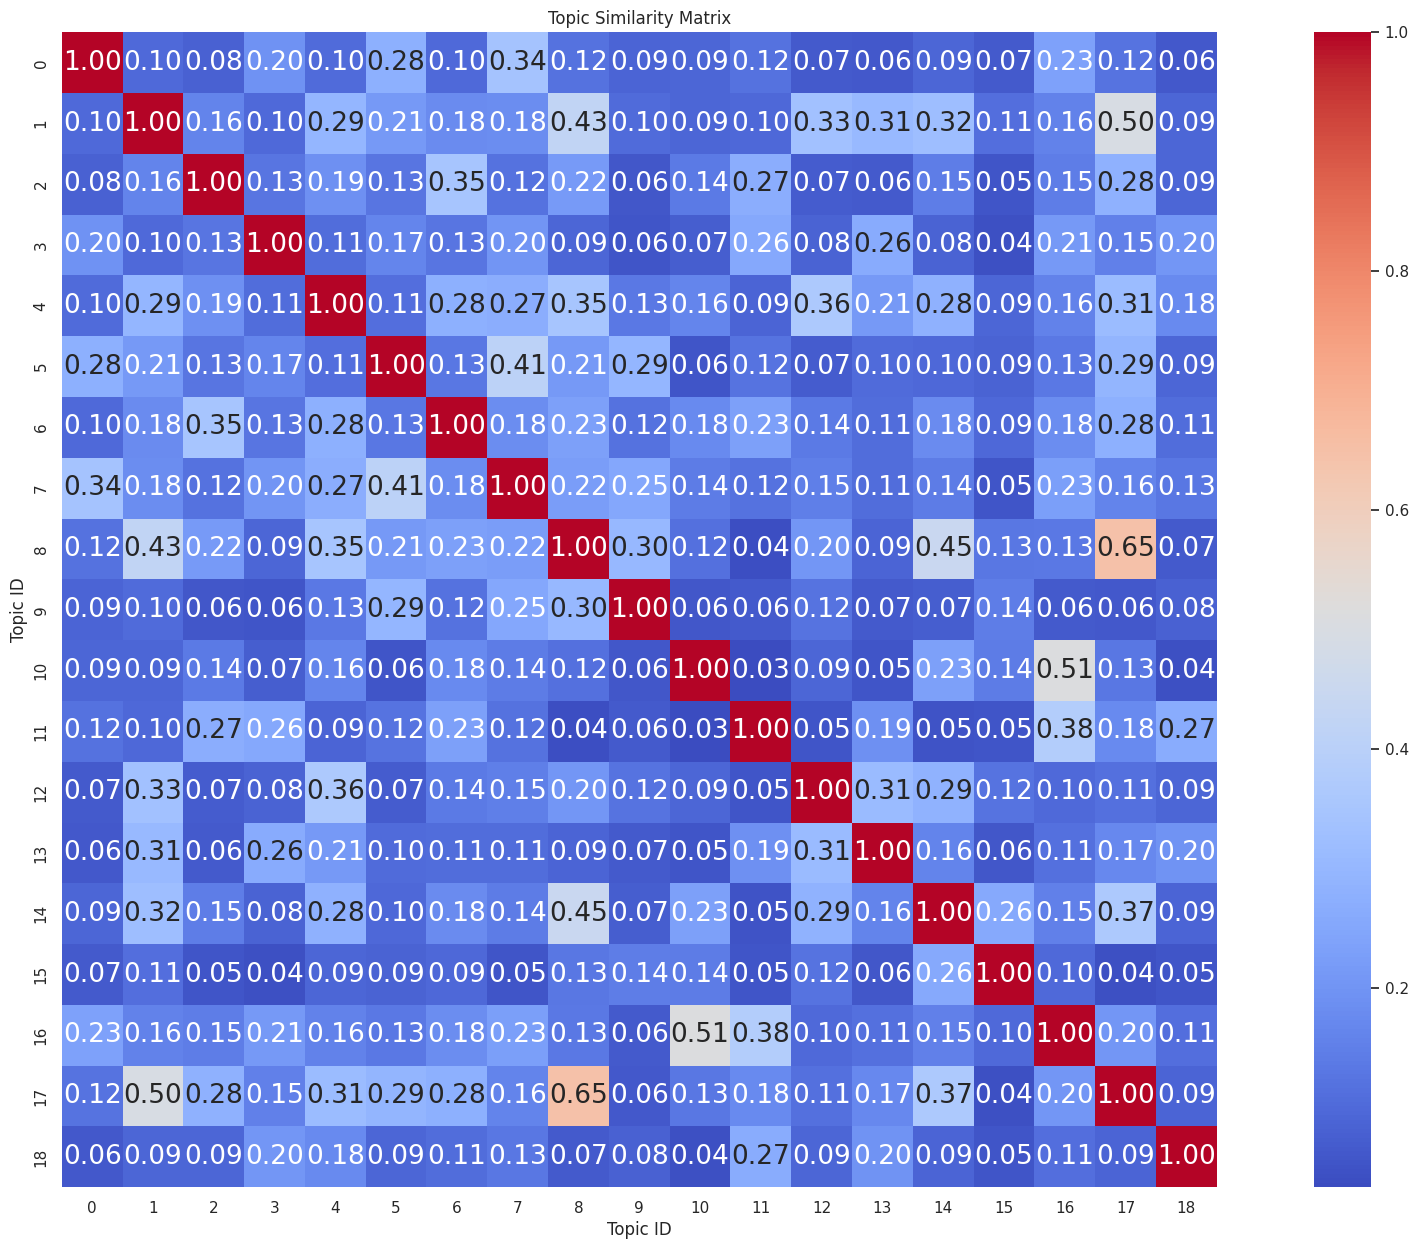

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Assuming lda_model is your trained LDA model
# Normalize the topic-word distribution
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Compute the cosine similarity matrix
topic_similarity_matrix = cosine_similarity(topic_word_distributions)

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
sns.heatmap(
    topic_similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": n_topics},
)
plt.title("Topic Similarity Matrix")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")

# Save the figure
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_similarity_matrix_scholar_{n_topics}.png', dpi=600)

plt.show()


In [ ]:
n_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


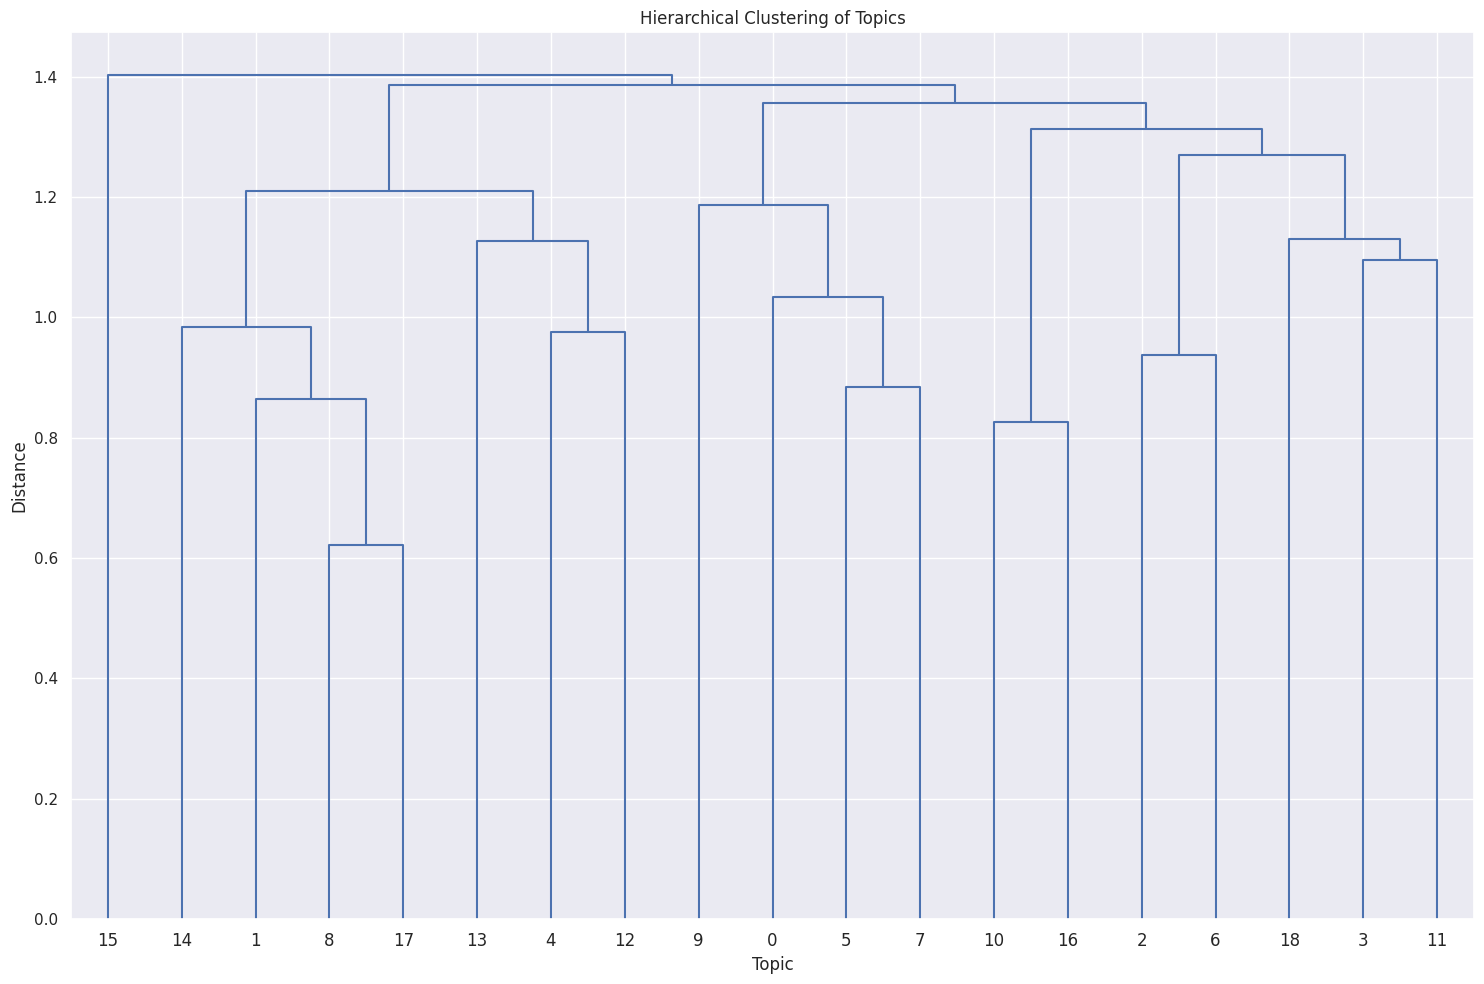

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.pairwise import cosine_similarity

# Assuming lda_model is your trained LDA model
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Compute the cosine similarity matrix
topic_similarity_matrix = cosine_similarity(topic_word_distributions)

# Perform hierarchical clustering
linkage_matrix = linkage(1 - topic_similarity_matrix, method="average")

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, color_threshold=0.5)
plt.title("Hierarchical Clustering of Topics")
plt.xlabel("Topic")
plt.ylabel("Distance")
plt.tight_layout()

# Save the figure in high resolution
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_clustering_dendrogram_scholar_{n_topics}.png', dpi=600)

plt.show()


In [2]:
## jaccard_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


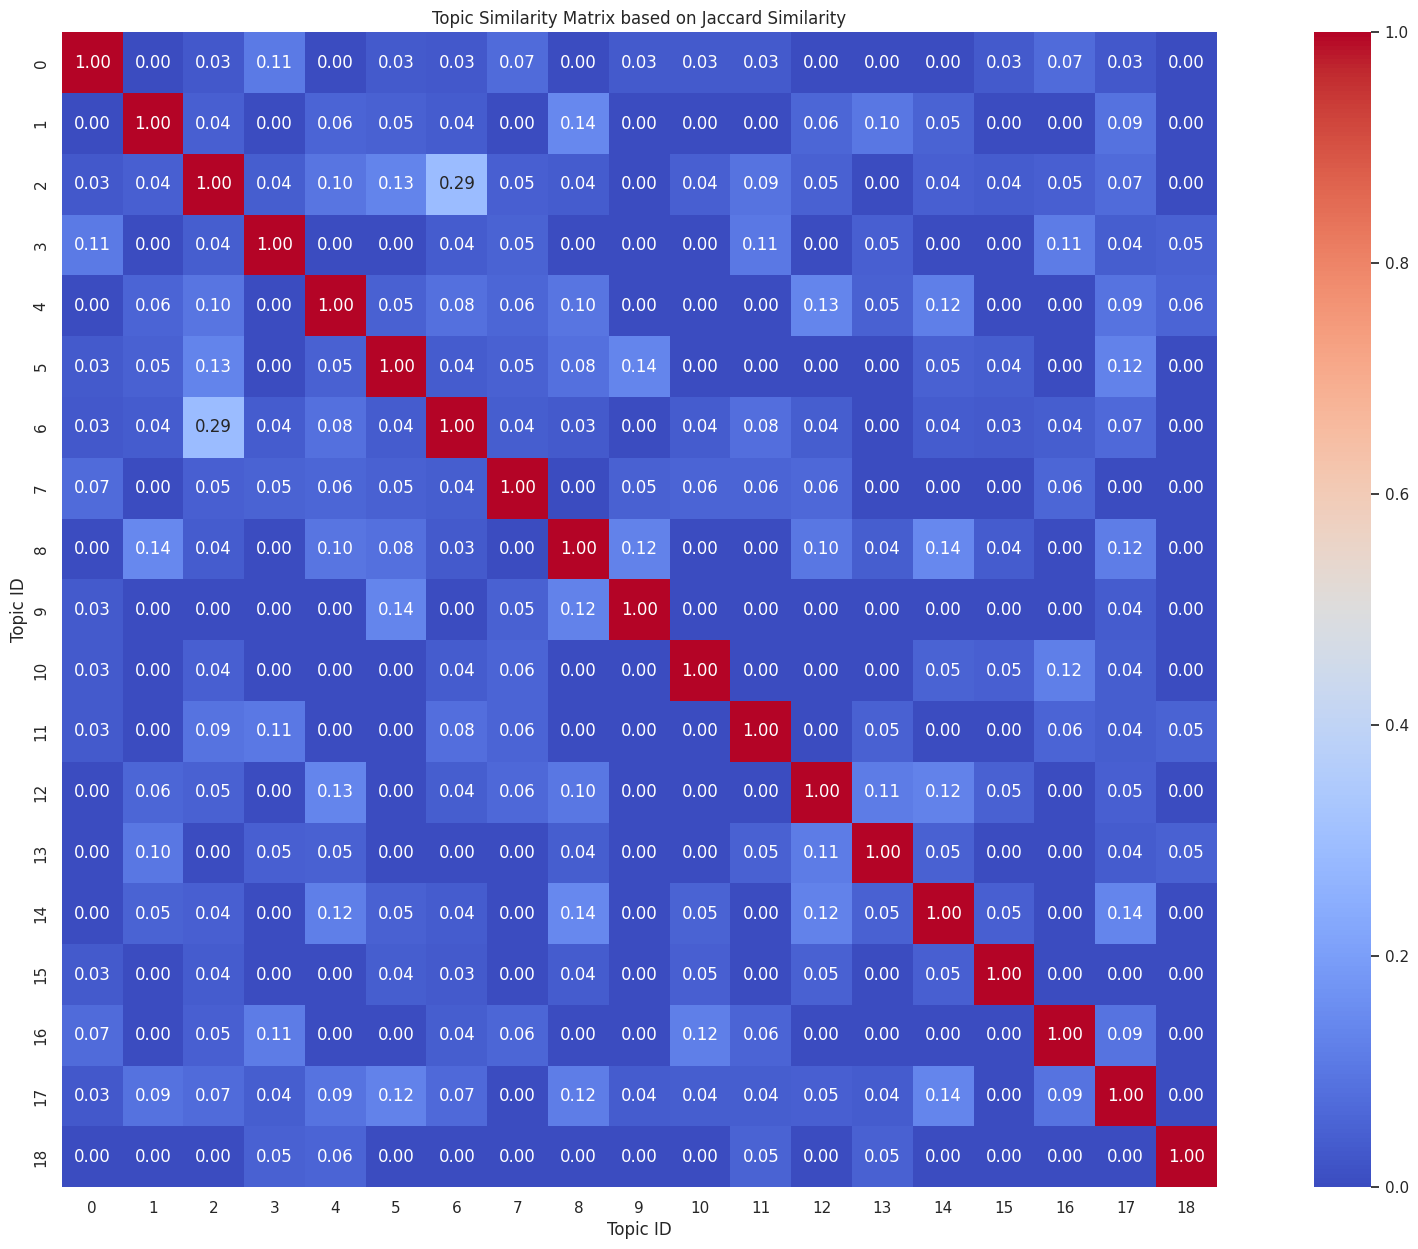

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
# Normalize the topic-word distribution
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Number of topics
n_topics = lda.components_.shape[0]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)


# Plot Heatmap
plt.figure(figsize=(25, 15))
sns.set(font_scale=1)
sns.heatmap(
    jaccard_similarity_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 12}
)
plt.title("Topic Similarity Matrix based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")

# Save the figure
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_similarity_matrix_jaccard_{n_topics}.png', dpi=600)

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-159-797de3ee1c14>:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")


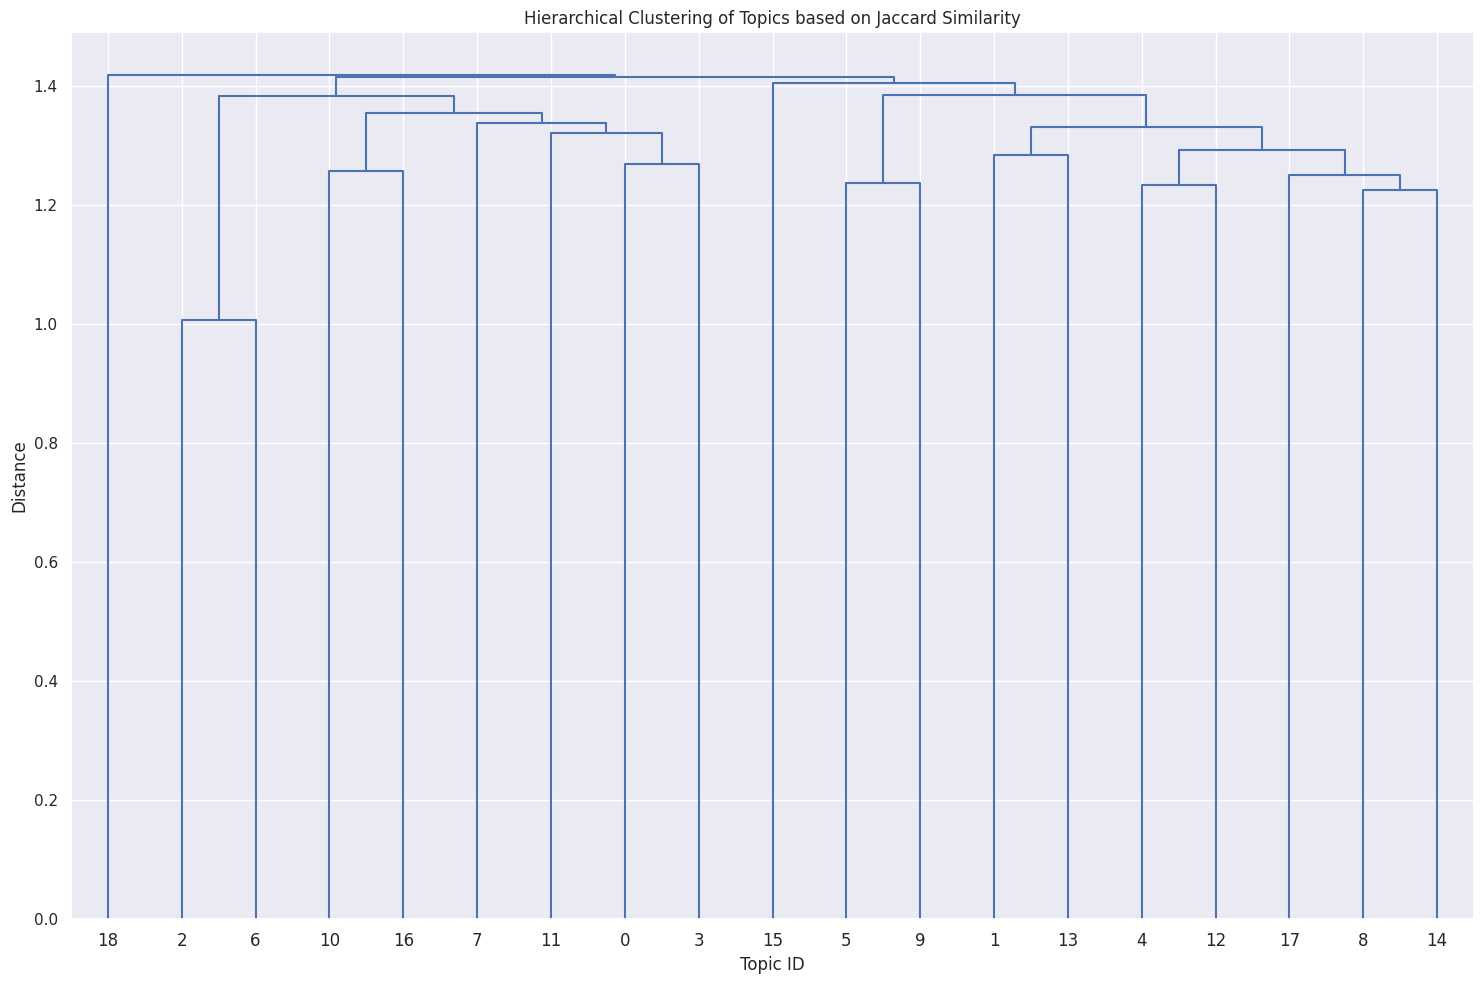

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import LatentDirichletAllocation

# Define Jaccard Similarity function
def jaccard_similarity(vector1, vector2, threshold=0.01):
    set1 = set(np.where(vector1 > threshold)[0])
    set2 = set(np.where(vector2 > threshold)[0])
    intersection = len(set1.intersection(set2))
    union = len(set1) + len(set2) - intersection
    if union == 0:
        return 0
    else:
        return intersection / union


# Assuming lda is your trained LDA model
n_topics = lda.components_.shape[0]
topic_word_distributions = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# Create Jaccard Similarity matrix
jaccard_similarity_matrix = np.zeros((n_topics, n_topics))

for i in range(n_topics):
    for j in range(n_topics):
        jaccard_similarity_matrix[i, j] = jaccard_similarity(topic_word_distributions[i, :], topic_word_distributions[j, :], threshold=0.01)

# Perform hierarchical clustering
linkage_matrix = linkage(1 - jaccard_similarity_matrix, method="average")

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, color_threshold=0.5)
plt.title("Hierarchical Clustering of Topics based on Jaccard Similarity")
plt.xlabel("Topic ID")
plt.ylabel("Distance")
plt.tight_layout()

# Save the figure in high resolution
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_clustering_dendrogram_jaccard_{n_topics}.png', dpi=600)

plt.show()


In [ ]:
# get_top_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_top_keywords(lda_model, vectorizer, n_words=50):
    terms = vectorizer.get_feature_names_out()
    topic_keywords = []

    for topic_idx, topic in enumerate(lda.components_):
        top_keywords_idx = topic.argsort()[::-1][:n_words]
        top_keywords = [(terms[i], topic[i]) for i in top_keywords_idx]
        topic_keywords.append(top_keywords)

    return topic_keywords

top_keywords = get_top_keywords(lda, vectorizer_tf, n_words=50)

# To display the topics with their keywords and scores
with open(f"/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/top_keywords_scholar_{n_topics}.txt", "w") as f:
    for idx, keywords in enumerate(top_keywords):
        f.write(f"Topic {idx}:\n")
        print(f"Topic {idx}:")
        for word, score in keywords:
            f.write(f"{word}, ")
            print(f"{word}", end=", ")
        f.write("\n\n")
        print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
gene, transcription, expression, promoter, rna, factor, polymerase, transcriptional, tuberculosis, regulation, regulatory, control, repressor, mrna, translation, rnap, protein, lambda, mycobacterium, regulate, coli, switch, phage, mycobacteriophage, transcript, reporter, regulator, encode, escherichia, initiation, complex, region, level, bacteriophage, late, termination, subunit, elongation, activation, use, sigma, bind, express, early, function, dependent, element, result, operator, activity, 

Topic 1:
phage, host, virus, viral, bacterial, bacteria, community, diversity, population, evolution, model, interaction, dynamic, microbial, bacteriophage, study, environment, infection, provide, understand, abundance, result, datum, microbiome, use, marine, approach, high, role, evolutionary, genetic, specie, different, analysis, composition, change, suggest, impact, new, adaptation, important, infect, evolve, viruse, network, abundant, microbiota, diverse, environmental, include, 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Emergent topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

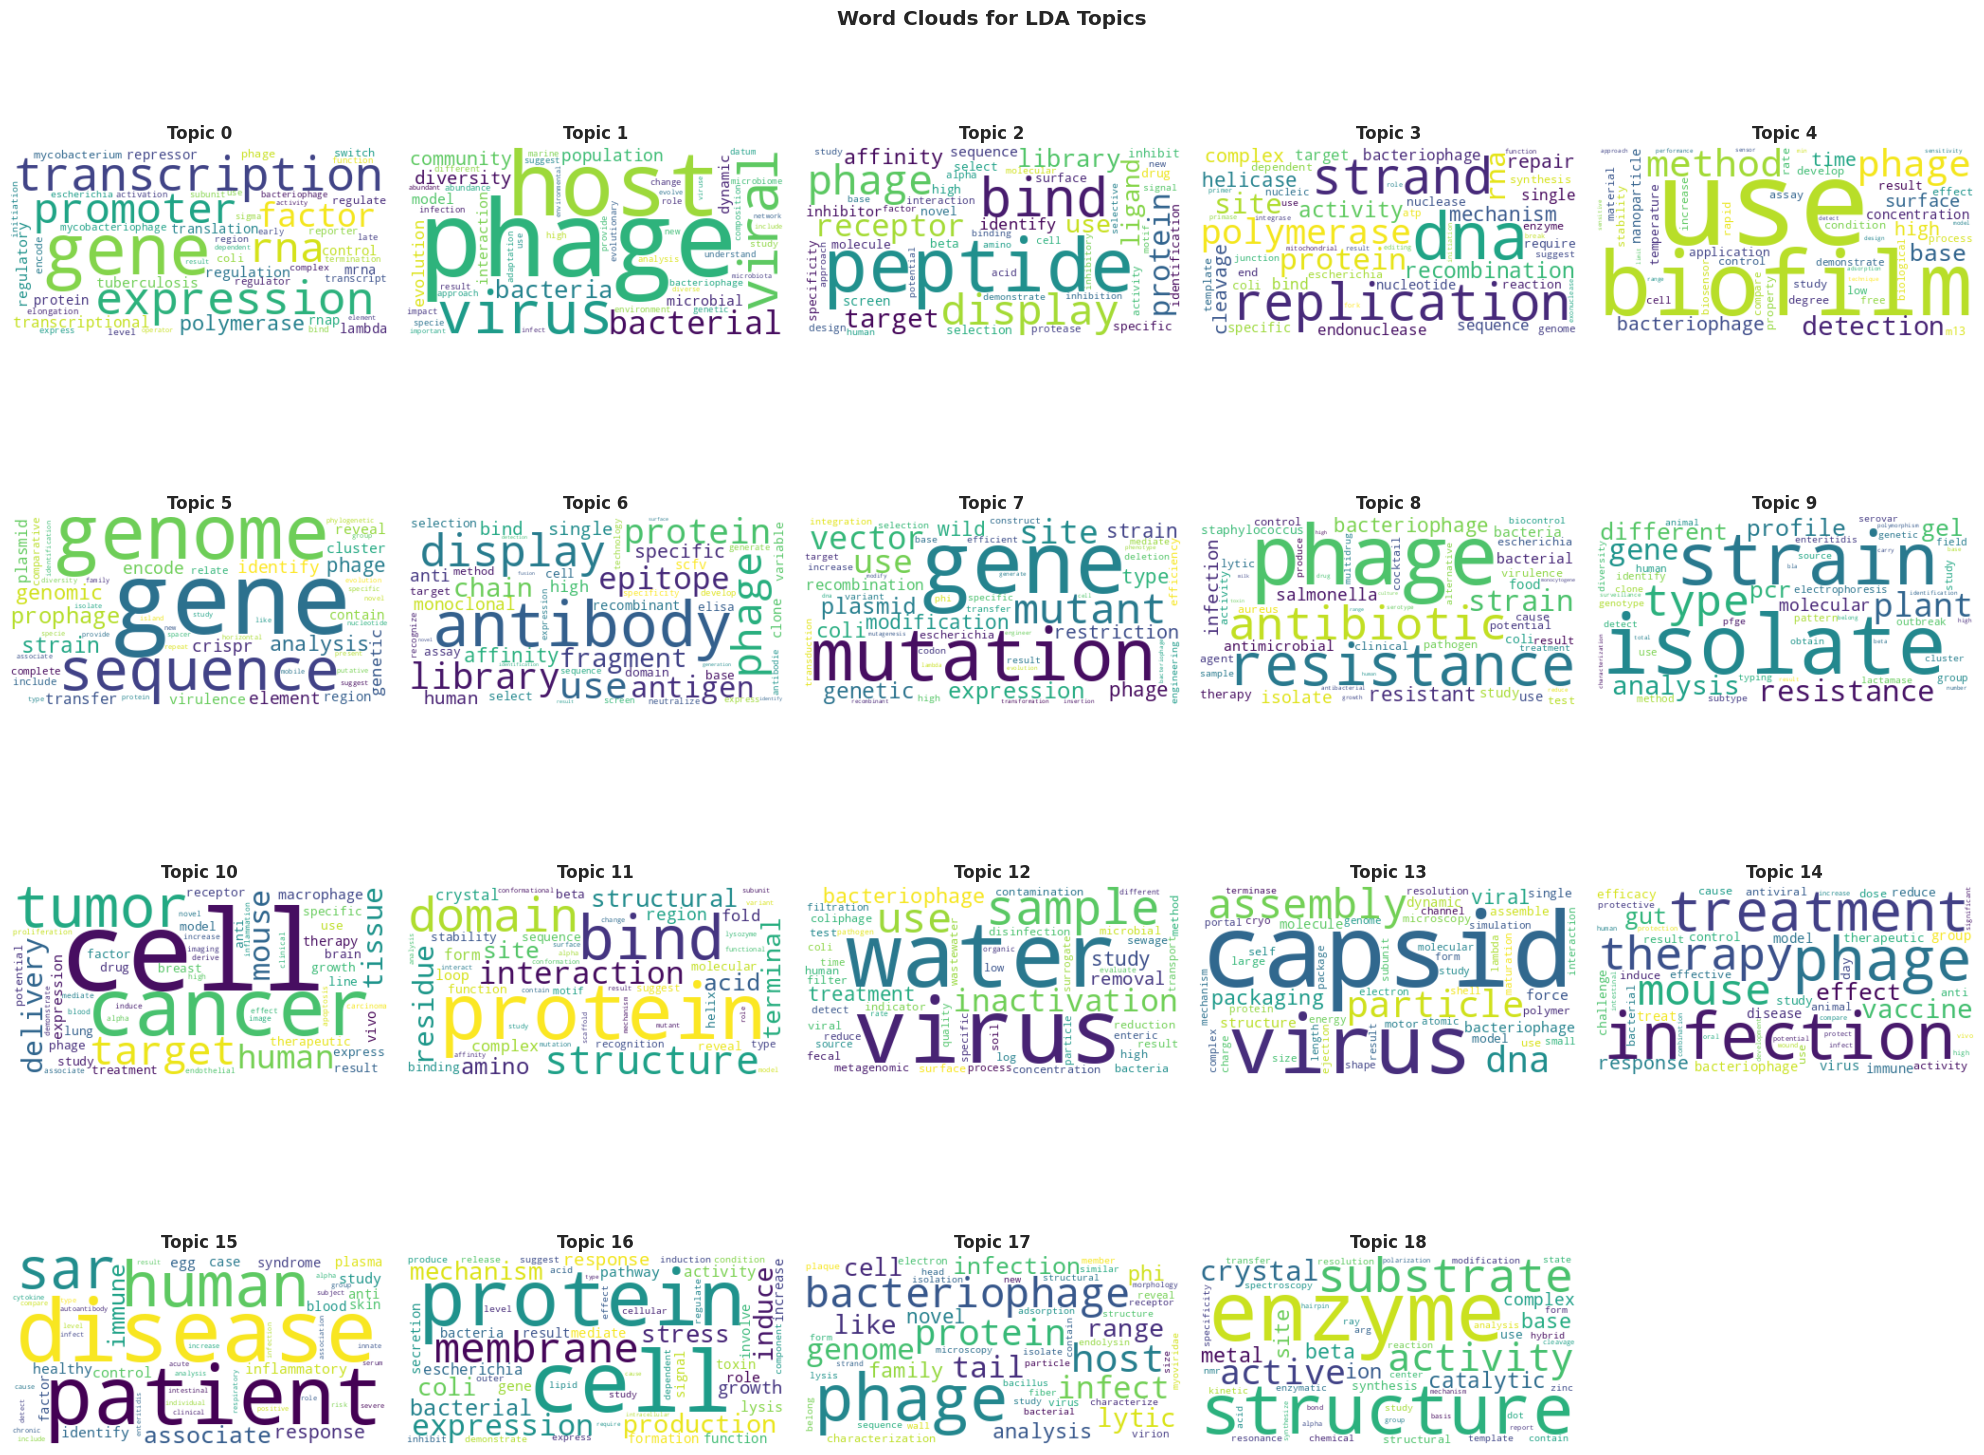

In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Word Clouds for topics
def plot_wordcloud(lda, topic_id, ax, n_words=50):
    terms = vectorizer_tf.get_feature_names_out()
    word_probs = {terms[i]: prob for i, prob in enumerate(lda.components_[topic_id])}
    wc = WordCloud(background_color='white', max_words=n_words).generate_from_frequencies(word_probs)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Topic {topic_id}", fontweight='bold')  # Bold title for each subplot

# Assuming n_topics to be the number of topics you've chosen
n_topics = n_topics  # Make sure this matches the number of topics in lda_model

# Calculate the number of rows needed
n_rows = int(np.ceil(n_topics / 5))

fig, axes = plt.subplots(n_rows, 5, figsize=(20, 4 * n_rows))

# Flatten the array and truncate it to match the number of topics
axes_flat = axes.flatten()[:n_topics]

for ax, topic_id in zip(axes_flat, range(n_topics)):
    plot_wordcloud(lda, topic_id, ax)

# Remove extra subplots
for idx in range(n_topics, len(axes.flatten())):
    fig.delaxes(axes.flatten()[idx])

plt.suptitle("Word Clouds for LDA Topics", fontweight='bold')  # Bold main title
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wordclouds_scholar_{n_topics}.png', dpi=600)  # Use raw string for path
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Attach Discovered Topic Labels to Original scholar publications

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
final_topics = lda.transform(tf_vectors)
final_topics.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(36202, 19)

In [ ]:
df["Topic N°"] = final_topics.argmax(axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0 Publication Type  \
UT (Unique WOS ID)  Publication Year                                
wos:000183215700003 2003                   23829                j   
wos:000180955900018 2003                   23830                j   
wos:000183683300008 2003                   23831                j   
wos:000184760800009 2003                   23832                j   
wos:000187153000005 2003                   23833                j   

                                                                                Authors  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   

                                                                      Author Full Names  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   

                                                                          Article Title  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              expression of recombinant human l-glutaminase ...   
wos:000180955900018 2003              structure-based improvement of the biophysical...   
wos:000183683300008 2003              activity of coliphage hk022 excisionase (xis) ...   
wos:000184760800009 2003              bacteriophages ms2 and prd1 in turfgrass by su...   
wos:000187153000005 2003              the refined structure of a protein catenane: t...   

                                                                           Source Title  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              biochimica et biophysica acta-proteins and pro...   
wos:000180955900018 2003                                                   biochemistry   
wos:000183683300008 2003                                                   febs letters   
wos:000184760800009 2003                      journal of environmental engineering-asce   
wos:000187153000005 2003                                   journal of molecular biology   

                                     Language Document Type  \
UT (Unique WOS ID)  Publication Year                          
wos:000183215700003 2003              english       article   
wos:000180955900018 2003              english       article   
wos:000183683300008 2003              english       article   
wos:000184760800009 2003              english       article   
wos:000187153000005 2003              english       article   

                                                                        Author Keywords  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              recombinant protein expression; human cdna; mi...   
wos:000180955900018 2003                                                            NaN   
wos:000183683300008 2003              site-specific recombination; excisionase; bact...   
wos:000184760800009 2003              vegetation; contamination; trickle irrigation;...   
wos:0001871530

In [ ]:
# Save data to CSV and Pickle formats
df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_{n_topics}.csv', index=False)
df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_{n_topics}.pkl')

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0 Publication Type  \
UT (Unique WOS ID)  Publication Year                                
wos:000183215700003 2003                   23829                j   
wos:000180955900018 2003                   23830                j   
wos:000183683300008 2003                   23831                j   
wos:000184760800009 2003                   23832                j   
wos:000187153000005 2003                   23833                j   

                                                                                Authors  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   

                                                                      Author Full Names  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              campos, ja; aledo, jc; segura, ja; alonso, fj;...   
wos:000180955900018 2003                            ewert, s; honegger, a; pluckthun, a   
wos:000183683300008 2003               gottfried, p; silberstein, n; yagil, e; kolot, m   
wos:000184760800009 2003              enriquez, c; alum, a; suarez-rey, em; choi, cy...   
wos:000187153000005 2003              heigstrand, c; wikoff, wr; duda, rl; hendrix, ...   

                                                                          Article Title  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              expression of recombinant human l-glutaminase ...   
wos:000180955900018 2003              structure-based improvement of the biophysical...   
wos:000183683300008 2003              activity of coliphage hk022 excisionase (xis) ...   
wos:000184760800009 2003              bacteriophages ms2 and prd1 in turfgrass by su...   
wos:000187153000005 2003              the refined structure of a protein catenane: t...   

                                                                           Source Title  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              biochimica et biophysica acta-proteins and pro...   
wos:000180955900018 2003                                                   biochemistry   
wos:000183683300008 2003                                                   febs letters   
wos:000184760800009 2003                      journal of environmental engineering-asce   
wos:000187153000005 2003                                   journal of molecular biology   

                                     Language Document Type  \
UT (Unique WOS ID)  Publication Year                          
wos:000183215700003 2003              english       article   
wos:000180955900018 2003              english       article   
wos:000183683300008 2003              english       article   
wos:000184760800009 2003              english       article   
wos:000187153000005 2003              english       article   

                                                                        Author Keywords  \
UT (Unique WOS ID)  Publication Year                                                      
wos:000183215700003 2003              recombinant protein expression; human cdna; mi...   
wos:000180955900018 2003                                                            NaN   
wos:000183683300008 2003              site-specific recombination; excisionase; bact...   
wos:000184760800009 2003              vegetation; contamination; trickle irrigation;...   
wos:0001871530

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Frequency Counting

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Step 1: Group data by 'Publication Year' and 'topic', then count occurrences
topic_counts_by_year = df.reset_index().groupby(['Publication Year', 'Topic N°']).size().unstack(fill_value=0)

# Step 2: Calculate the total count of each topic
total_counts = topic_counts_by_year.sum()

# Step 3: Sort columns by total count
sorted_columns = total_counts.sort_values(ascending=False).index
topic_counts_by_year = topic_counts_by_year[sorted_columns]

# Step 4: Add a row with the total count of each topic
topic_counts_by_year.loc['Total'] = total_counts.loc[sorted_columns]

# Save the DataFrame to CSV and pickle files
topic_counts_by_year.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_counts_by_year_scholar_{n_topics}.csv')
topic_counts_by_year.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_counts_by_year_scholar_{n_topics}.pkl')

# This will give you a DataFrame where each row is a year (plus a 'Total' row at the bottom),
# and each column is the count of documents associated with a topic for that year (and the total count).

# Display the updated DataFrame
topic_counts_by_year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic N°            6     8     5     1     4     2     12    11    10    17  \
Publication Year                                                               
2003               197    98   108    32    57   136    84   161    42    41   
2004               204    68   116    35    67   114    76   164    66    39   
2005               195    81   112    49    53   108    65   143    52    46   
2006               219    93   106    54    57   118    69   129    73    52   
2007               219   129    93    66    94   116    76    97    83    56   
2008               207    90   102    91    87   120    86   106    72    72   
2009               203    92   109    69   100   113    97   126    73    66   
2010               210   112   121    84    99   127   119   111    91    70   
2011               200   138   145   115   111   150    96   105    92    76   
2012               182   159   183   103   129   122   118   101    84   107   
2013               216   147   166   123   115   117    96   100    90    85   
2014               234   159   160   146   133   108   114    92    85    96   
2015               201   174   162   143   136   115   124    85   102    81   
2016               229   212   184   150   138   133   124    80    92   102   
2017               195   235   182   190   163   106   127    72    99    99   
2018               181   265   200   196   163    91   132    68    99   116   
2019               199   270   255   207   135    86   129    79    96   132   
2020               184   354   218   211   167    98   127    60   103   128   
2021               195   365   257   277   185    97   156    63    97   134   
2022               221   468   337   326   210   108   189    69   162   159   
2023                88   227   117   165   106    45    76    21   100    82   
Total             4179  3936  3433  2832  2505  2328  2280  2032  1853  1839   

Topic N°            16    13    3     7     14   0    9    18   15  
Publication Year                                                    
2003                83    68   101    85    22   44   40   36   16  
2004                93    54    86    87    21   52   45   33   18  
2005                74    54    77    76    30   48   30   34   16  
2006                79    69    91    68    26   42   44   29   13  
2007                74    90    93    54    22   38   47   34   10  
2008                66    91    69    58    30   44   38   34   17  
2009                73    93    59    58    41   34   35   29   13  
2010                75    65    62    58    49   38   43   26   13  
2011                96    85    71    55    39   27   40   25   16  
2012                92    74    81    61    41   28   39   14   10  
2013               100    86    66    51    54   35   33   28    7  
2014                89    80    62    60    44   40   27   23   17  
2015                87    62    53    48    52   32   34   16   10  
2016                87    77    61    46    56   34   25   17   13  
2017                83    72    62    45    77   21   11   22   10  
2018                86    68    48    60    68   32   21   19   15  
2019                71    58    53    42    86   24   13   19   21  
2020                89    43    36    46    81   27   13   17   20  
2021                81    56    32    39   113   18   10   20   24  
2022               135    37    47    66   143   37   14   19   39  
2023                56    16    27    17    54   12    3    3   25  
Total             1769  1398  1337  1180  1149  707  605  497  343

In [ ]:
# Evolution Curve for Each Topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


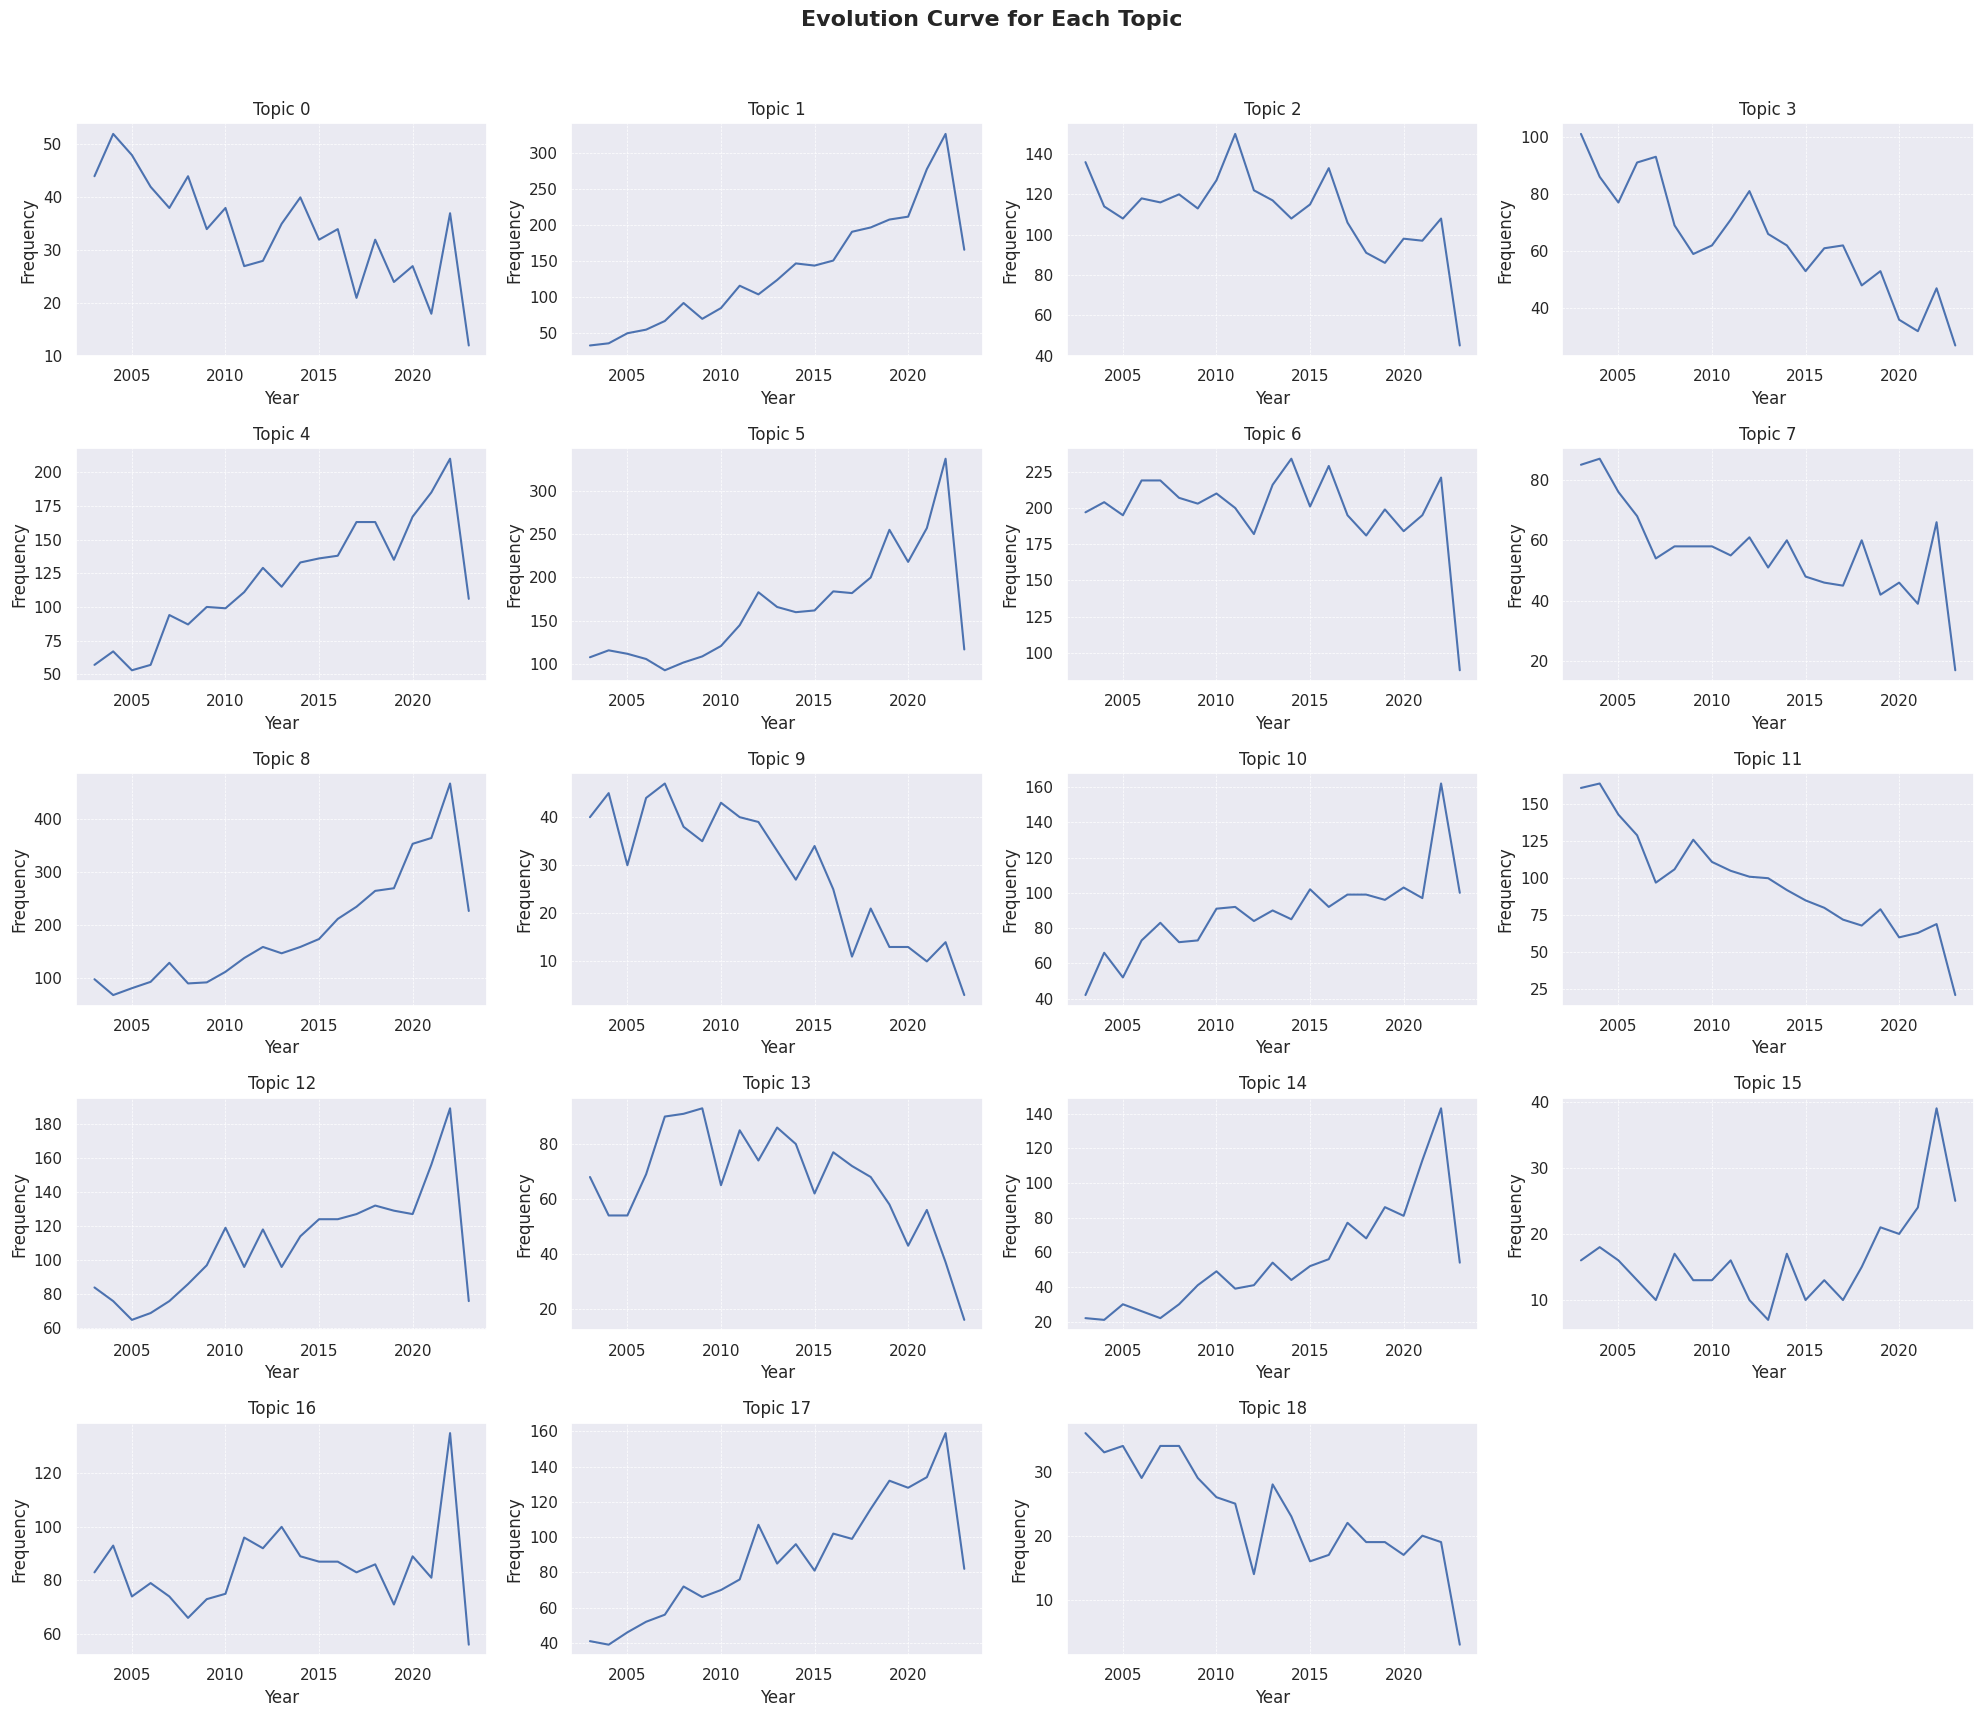

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the DataFrame from the CSV file (assuming it's stored as 'topic_counts_by_year.csv')
# Replace this line with your actual data if it's not in a CSV
#topic_counts_by_year = pd.read_csv('topic_counts_by_year.csv', index_col='Publication Year')

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Define the number of topics (make sure this matches your data)
n_topics = len(topic_counts_by_year.columns)

# Calculate the number of rows needed for subplots
n_rows = (n_topics + 3) // 4  # +4 for rounding up

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(20, n_rows * 3.5))

# Flatten the array to easily iterate over it
axes_flat = axes.flatten()

# Loop through each topic and plot its curve on a separate subplot
for i, topic in enumerate(topic_counts_by_year.columns):
    axes_flat[i].plot(
        topic_counts_by_year.index,
        topic_counts_by_year[topic]
    )
    axes_flat[i].set_title(f'Topic {topic}')
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Frequency')
    axes_flat[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove extra subplots
for i in range(n_topics, len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Add a main title for the entire figure
fig.suptitle('Evolution Curve for Each Topic', fontsize=16, fontweight='bold')

# Save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.savefig(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_evolution_curves_subplot_ordered_scholar_{n_topics}.png', dpi=600)

# Show the figure
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Temporal Heatmaps: Display how topic proportions change over time.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


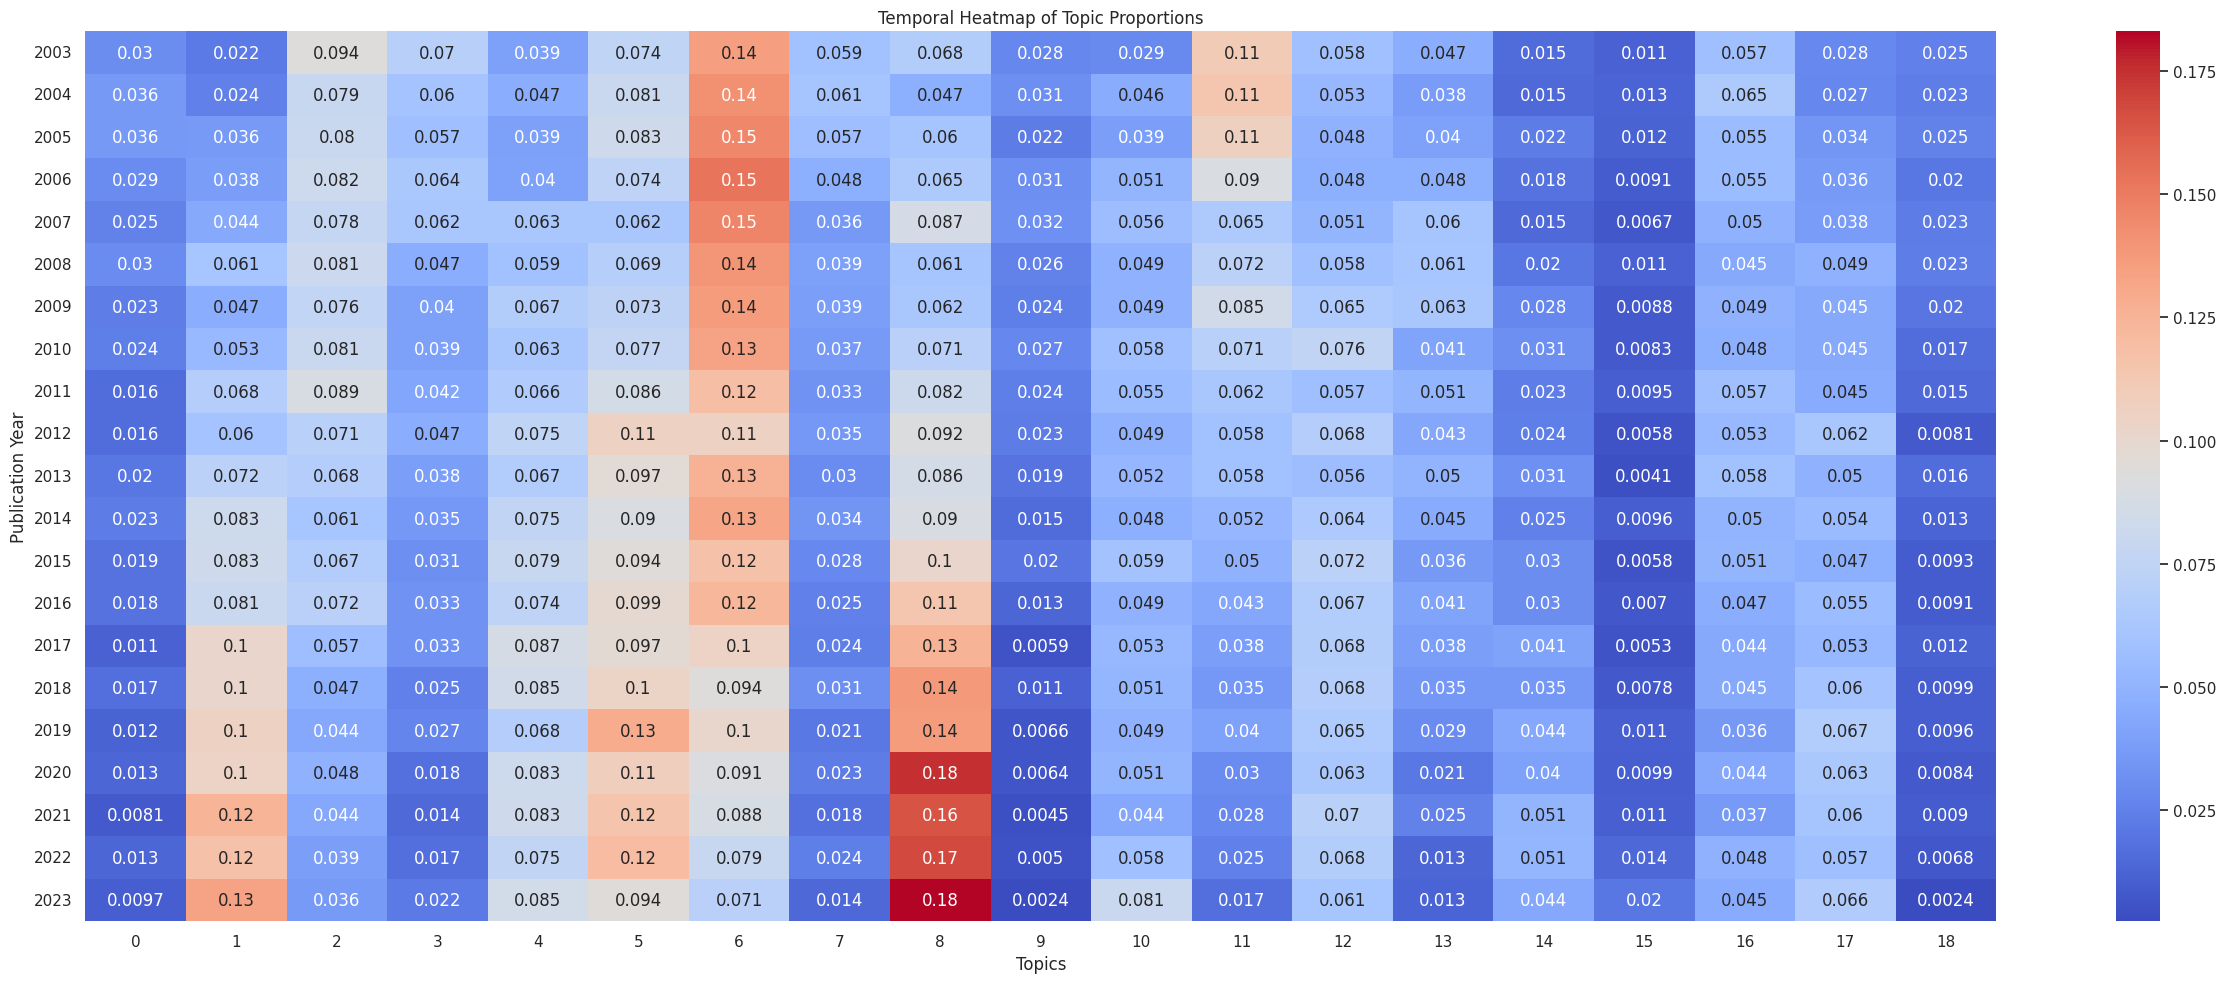

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assume you already have topic_counts_by_year DataFrame

# Remove the 'Total' row if it exists
if 'Total' in topic_counts_by_year.index:
    topic_counts_by_year = topic_counts_by_year.drop(index=['Total'])

# Sort columns by topic name
topic_counts_by_year = topic_counts_by_year.sort_index(axis=1)

# Calculate the total count for each year (row-wise sum)
total_counts_by_year = topic_counts_by_year.sum(axis=1)

# Normalize frequencies to get proportions
proportions_by_year = topic_counts_by_year.divide(total_counts_by_year, axis=0)

# Create the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(proportions_by_year.fillna(0), annot=True, cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)

# Add labels and title
plt.title('Temporal Heatmap of Topic Proportions')
plt.xlabel('Topics')
plt.ylabel('Publication Year')

# Save the figure
plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/temporal_heatmap_topic_proportions_scholar_{n_topics}.png")  # Save the plot to a PNG file

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
